# Felipe Castillo
# Activity 5 and 6
# Data Preparation 
# 1/17/2022

In [1]:
import os 
import pandas as pd
import numpy as np
import string 
from bs4 import BeautifulSoup
import pixiedust
import matplotlib.pyplot as plt



#Changing directory to work with my directory

os.chdir("C:\DataScience_DSC_540\Week5_6")

Pixiedust database opened successfully


# First Take Read the page using bs4

In [52]:

#wiki_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
#Open html wikipeida file
with open("List of countries by GDP (nominal) - Wikipedia.htm" , "r", encoding="utf8") as file_html:
    soup = BeautifulSoup(file_html)
    #print(soup.prettify())


# Task 2 how many tables

In [4]:
# Find the table and how many are there.

table = soup.findAll("table")

#converting into string to get length
print("There are " +str(len(table)) + " tables")


There are 9 tables


# Task 3 Find the right table

In [51]:
#Class name when click also you to see Html Class wikitable
gdp_table = soup.find("table",{"class": '"wikitable"|}'})
#gdp_table



# Task 4 separate the soruce from data

In [6]:
#Find index of tr and maping to source name
# should contain three values 

#looking for first value at index 0 
source_names  = gdp_table.findAll("tr")[0]
source_list = []

#source equals to three all values will be put in list
for source in source_names:
    source_list.append(source)

#showing list values
print(source_list)
    
    
    



['\n', <td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> (2017)</b><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">[1]</a></sup>
</td>, '\n', <td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/World_Bank" title="World Bank">World Bank</a> (2017)</b><sup class="reference" id="cite_ref-worldbank_20-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-worldbank-20">[20]</a></sup>
</td>, '\n', <td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/United_Nations" title="United Nations">United Nations</a> (2016)</b><sup class="reference" id="cite_ref-21"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-21">[21]</a><

# Task 5 Check how to get the source 

In [7]:
#All soruces are wraped in anchor tag

for text in source_names.findAll('a'):
    
    #Removing the brackets [] that include a url link
    #Once removed the item is strip from uncessary values
    temp_value = text.getText().split('[')[0].strip()
    print(temp_value)


International Monetary Fund

World Bank

United Nations




# Task 6 seperate the header and data first source

In [8]:
#Split the header out

#taking value straight from wikipedia thead
#thead contains the header values
header_source = gdp_table.find("thead")

headers = []
for header in header_source:
    #split infers a array setting its instance point to header
    headers =  header.getText().strip().split("\n")
print(headers)   
    


['Rank', 'Country', 'GDP(US$MM)']


In [11]:

#Looking for the first row in the three data feilds
#tobody contains tr
#should bring in one value 
#value text contains all group values
first_row = gdp_table.findAll('tbody')[0].findAll('tr')

In [50]:


data_row_one = []

# Taking values and getting text
# 3 other values were found removed with similar words like rank and world
for values in first_row:
    if  ("Rank" not in values.get_text() and "World" not in values.get_text() and len(values.get_text()) < 60 ):
        #Combo of group come with uncessary string characterstics and are removed and strip
        data_container = values.get_text().strip().replace("\n","@").replace(u'\xa0', u' ').split("@")
        data_row_one.append((data_container))





In [44]:
#Result from header and data
df1 = pd.DataFrame(data_row_one, columns=headers)
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


# Actvity 8: Handling Outliers and Missing Data

In [18]:
visit_data = pd.read_csv("visit_data.csv")

In [19]:
visit_data.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


# Task -1 Are there duplicates 

In [20]:
# Checking for number of duplcaites seems like first name and last name has duplicates
#iterating by column names
#access value in data frame by column
# checking each value contains a duplicate by sum

print("Duplicates in data set")
for column in list(visit_data.columns.values):
    print(column, " number of duplicates ", visit_data[column].duplicated().sum())
        
    



Duplicates in data set
id  number of duplicates  0
first_name  number of duplicates  320
last_name  number of duplicates  299
email  number of duplicates  0
gender  number of duplicates  997
ip_address  number of duplicates  0
visit  number of duplicates  164


# Task 2 - Do essentail columns contain NAN

In [45]:
#3
#iterating by column names
#access value in data frame by column


print("NANs in data set")
for column in list(visit_data.columns.values):
    print(column, ":", visit_data[column].isnull().sum())

        
        
# checking each value by null value
  
    



NANs in data set
id : 0
first_name : 296
last_name : 296
email : 0
gender : 505
ip_address : 0
visit : 26


# Getting rid of outliers

In [22]:
# Removing outliets
#checking the basic information that can give me the perentage below or above the mean
visit_data['visit'].describe()

count     974.000000
mean     1497.976386
std       838.959460
min         1.000000
25%       794.500000
50%      1477.000000
75%      2224.250000
max      2998.000000
Name: visit, dtype: float64

In [48]:
from scipy.stats import iqr
import numpy as np

#getting the quantile for first q1 and q3 then staying at the margins considered an outlier
#The quantile can be adjusted to what I believe is an outlier. 
#currently I set it to .10 and .90

#drop all null values before 
Above_Q1 = np.quantile(visit_data['visit'].dropna(),0.10)
Below_Q3 = np.quantile(visit_data['visit'].dropna(),0.90)

#values that were calculated to be in the outliers category
print("Below {0} and Above {1}".format(Above_Q1, Below_Q3))
visit_data_reduced_outliers =  visit_data[(visit_data['visit'] >= Above_Q1) & (visit_data['visit'] <= Below_Q3)].copy()








Below 358.3 and Above 2658.0


# Task 4 Report size difference

In [26]:
print(' Before {0} After {1}'.format(visit_data.shape, visit_data_reduced_outliers.shape))

 Before (1000, 7) After (779, 7)


# Task Plot box plot to find more outliers 

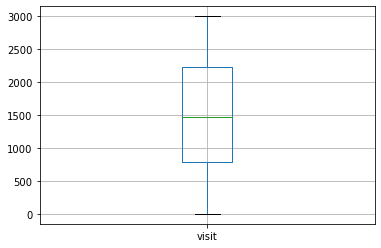

In [29]:
#identifyiny outliers 
#first data frame with outliers showing a high 3000 and a low of zero

boxplot = visit_data.boxplot(column=['visit'])
boxplot.plot()

plt.show()



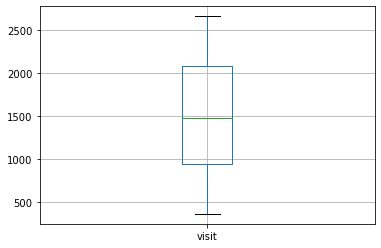

In [30]:
#Outliers reduced without
boxplot = visit_data_reduced_outliers.boxplot(column=['visit'])
boxplot.plot()

plt.show()


<AxesSubplot:>

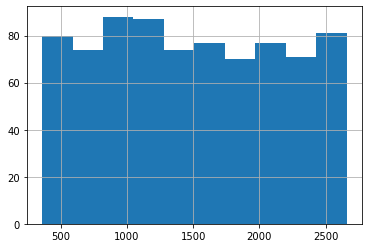

In [31]:
#seeing if there are other abnormailties that could skew the data
visit_data_reduced_outliers.visit.hist()

In [37]:
#Reapply similar logic to remove outliers 

#resetting outliers calculations 
visit_data_reduced_outliers_2 = visit_data_reduced_outliers[(visit_data_reduced_outliers['visit'] >= 500) & (visit_data_reduced_outliers['visit'] <= 2500)].copy()




                     

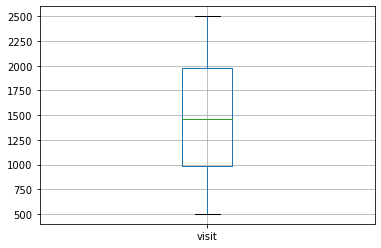

In [49]:
#Outliers reduced to 2500 and 500 


boxplot = visit_data_reduced_outliers_2.boxplot(column=['visit'])
boxplot.plot()

plt.show()





In [41]:
print(' Before {0} After {1}'.format(visit_data.shape, visit_data_reduced_outliers_2.shape))

 Before (1000, 7) After (686, 7)


# Working with SQL LITE

In [229]:
import sqlite3
import sqlalchemy as sqla

In [197]:
#All values a string object
#Name, Address, City, State, Zip, Phone Number
query = """Create Table students_datascience(name VARCHAR, 
                                 address VARCHAR,
                                 city VARCHAR,
                                 state VARCHAR(2),
                                 zip VARCHAR(5),
                                 phone_number VARCHAR(10));"""

In [198]:
#connceting to sqlite 
con = sqlite3.connect("mydata.sqlite")

In [199]:
#creating object of sqlite 
con.execute(query)

In [200]:
con.commit()

In [223]:
#Aking 10 value swith similar char
#Name, Address, City, State, Zip, Phone Number
student_data = [("Felipe Castillo" , '9000 e S',"Oklahoma City" , 'OK', '76000',"8009850980"),
                ("Bob Marly",'3245  N st',"Dallas",'TX','87032',"8005691188"),
                ("Brittney Spears",'5000 e Hillcreast',"Los Angles" ,'CL', '90011',"8007750381"),
                ("Heith Ledger",'2134 w Osage',"Los Angles" ,'CL', '90011',"5807910980"),
                ("Donald Trump",'5678 Trumpe Tower', "New York City", 'NY', '10001',"8183209800"),
                ("Hillary Cliton",'7818 N Cliton ave',"Washigton",'DC', '20001',"7170850980"),
                ("Clark Kent",'1234 Farm st', "Smallville",'KS', '64030',"8889851981"),
                ("Tony Stark",'54302 mansion lane',"New York City" ,'NY', '10001',"8883650080"),
                ("Gwen Stacy",'3215 e ken st',"San Fransico",'CL','90011',"9998850970"),
                ("Peter Parker",'9000 Queens Street',"New York City" ,'NY', '10001',"3407850480")]

In [224]:
# creating a query to insert values
stmt = "INSERT INTO students_datascience VALUES(?,?,?,?,?,?)"

In [215]:
#inserting are and apply the insert comand sql
con.executemany(stmt,student_data)

In [216]:
cursor = con.execute('select * from students_datascience')

In [217]:
rows = cursor.fetchall()

In [218]:
#ALl values inserted in sql table 
rows

[('Felipe Castillo', '9000 e S', 'Oklahoma City', 'OK', '76000', '8009850980'),
 ('Bob Marly', '3245  N st', 'Dallas', 'TX', '87032', '8005691188'),
 ('Brittney Spears',
  '5000 e Hillcreast',
  'Los Angles',
  'CL',
  '90011',
  '8007750381'),
 ('Heith Ledger', '2134 w Osage', 'Los Angles', 'CL', '90011', '5807910980'),
 ('Donald Trump',
  '5678 Trumpe Tower',
  'New York City',
  'NY',
  '10001',
  '8183209800'),
 ('Hillary Cliton',
  '7818 N Cliton ave',
  'Washigton',
  'DC',
  '20001',
  '7170850980'),
 ('Clark Kent', '1234 Farm st', 'Smallville', 'KS', '64030', '8889851981'),
 ('Tony Stark',
  '54302 mansion lane',
  'New York City',
  'NY',
  '10001',
  '8883650080'),
 ('Gwen Stacy', '3215 e ken st', 'San Fransico', 'CL', '90011', '9998850970'),
 ('Peter Parker',
  '9000 Queens Street',
  'New York City',
  'NY',
  '10001',
  '3407850480'),
 ('Felipe Castillo', '9000 e S', 'Oklahoma City', 'OK', '76000', '8009850980'),
 ('Bob Marly', '3245  N st', 'Dallas', 'TX', '87032', '80056